In [11]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statistics
from scipy.stats import mannwhitneyu
import pymorphy2

##### патч для работы модуля pymorphy2 на старых версиях python

In [13]:
def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)

In [15]:
pymorphy2_311_hotfix()
morph = pymorphy2.MorphAnalyzer()

##### Выбрать на сайте http://www.lib.ru любой крупный текст, например, русскую классику
Выбрал сказку Михаэль Энде. Бесконечная история
http://www.lib.ru/INPROZ/ENDE/istoriya.txt

##### С помощью следующего кода провести парсинг текста в строку (установить библиотеку bs4!)

In [33]:
import bs4
import requests
import string

url = "http://www.lib.ru/INPROZ/ENDE/istoriya.txt"
#получаем содержимое страницы
response = requests.get(url)
#парсим страницу при помощи lxml
soup = bs4.BeautifulSoup(response.text,'lxml')
#достаем из body текст разделяем пробелами и убираем лишние пробелы
text = soup.body.get_text(' ', strip=True)
#переменна text содержит информацию с страницы из лишних пробелов

##### Определить 10 самых часто встречающихся слов 

In [59]:
#убираем знаки все знаки, все символы делаем малым регистром и разделение текста на слова 
text = text.lower().translate(str.maketrans('', '', string.punctuation)).translate(str.maketrans('', '', string.digits))
words = text.split() 
#создание датафрейма и запишем в него слова построчно
df = pd.DataFrame(words, columns=['word'])
#как часто встречаются слова
df_counts = df['word'].value_counts().reset_index()
#вывод 10 самых часто встречающихся слов из текста
df_counts.sort_values(by='count', ascending=False).head(10)

,word,count
0,и,4279
1,не,2305
2,в,2285
3,он,1933
4,на,1703
5,что,1568
6,с,974
7,но,967
8,все,961
9,бастиан,960


##### Построить гистограмму распределения

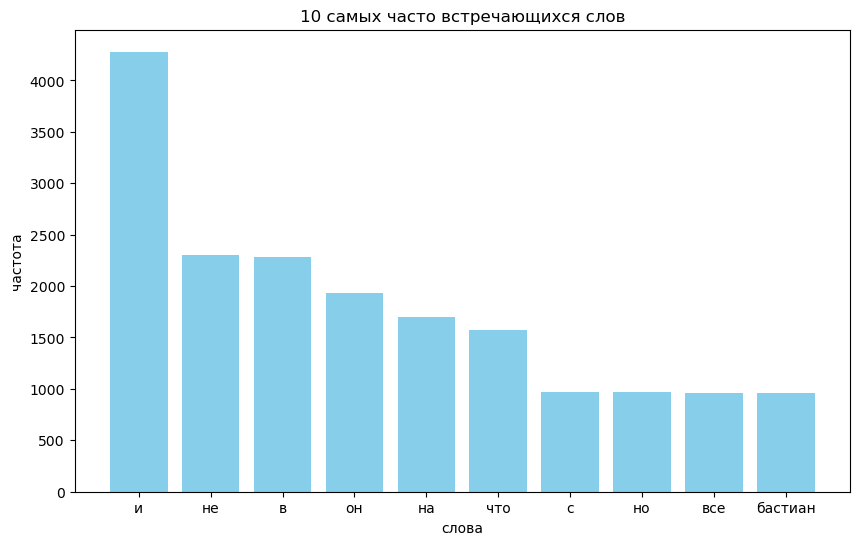

In [73]:
df_bar = df_counts.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(df_bar['word'], df_bar['count'], color='skyblue')
plt.xlabel('cлова')
plt.ylabel('частота')
plt.title('10 самых часто встречающихся слов')
plt.show()